In [26]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [27]:
## Source: http://www.ecdms.energy.ca.gov
filename = "MER_T10_05_cut.csv"
filepath = os.path.join("data",filename)

months = pd.read_csv(filepath,index_col=False)
months.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Y,M
0,SOT8BUS,201201,3.210,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu,2012,1
1,SOT8BUS,201202,3.460,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu,2012,2
2,SOT8BUS,201203,4.768,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu,2012,3
3,SOT8BUS,201204,5.255,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu,2012,4
4,SOT8BUS,201205,5.801,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu,2012,5


In [28]:
months.dtypes

MSN              object
YYYYMM            int64
Value           float64
Column_Order      int64
Description      object
Unit             object
Y                 int64
M                 int64
dtype: object

YYYYMM
2012-01-01    3.210
2012-02-01    3.460
2012-03-01    4.768
2012-04-01    5.255
2012-05-01    5.801
Name: Value, dtype: float64


/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


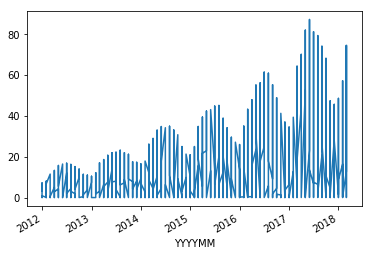

In [29]:

from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('data/monthdatacut.csv', header=0)
print(series.head())
series.plot()
pyplot.show()


/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """


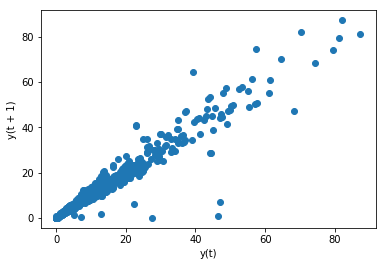

In [30]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
series = Series.from_csv('data/monthdatacut.csv', header=0)
lag_plot(series)
pyplot.show()

In [31]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = Series.from_csv('data/monthdatacut.csv', header=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.966051
t+1  0.966051  1.000000


/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


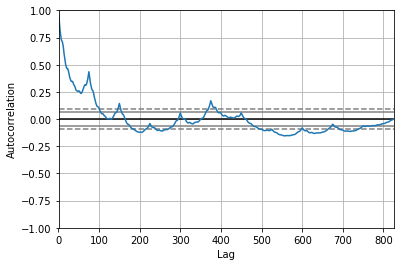

In [32]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
series = Series.from_csv('data/monthdatacut.csv', header=0)
autocorrelation_plot(series)
pyplot.show()

/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


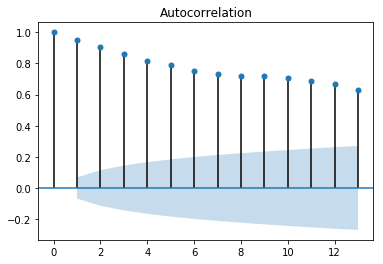

In [33]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_csv('data/monthdatacut.csv', header=0)
plot_acf(series, lags=13)
pyplot.show()

Test MSE: 186.529


/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


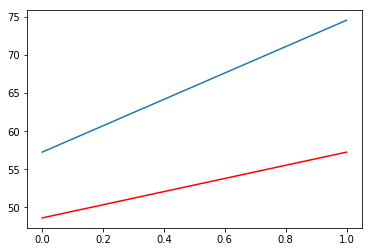

In [34]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = Series.from_csv('data/monthdatacut.csv', header=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-2], X[len(X)-2:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

Lag: 20
Coefficients: [ 0.23604509  1.04406048 -0.08215207 -0.04041264 -0.09296387  0.2097791
 -0.20797961  0.05475721  0.00661258  0.178886   -0.04660436 -0.00423625
  0.16303543 -0.25143314  0.03742968  0.07766276 -0.04427761 -0.06590739
  0.03099429 -0.02383631  0.04169329]
predicted=68.604431, expected=70.208000
predicted=71.854805, expected=82.084000
predicted=71.036321, expected=87.309000
predicted=67.869079, expected=81.295000
predicted=65.801273, expected=79.435000
predicted=58.021596, expected=74.195000
predicted=51.853571, expected=68.260000
predicted=47.243562, expected=47.416000
predicted=47.678564, expected=45.697000
predicted=49.876069, expected=48.632000
predicted=53.001457, expected=57.253000
predicted=59.620795, expected=74.537000
Test MSE: 126.247


/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


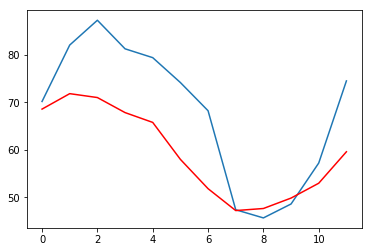

In [35]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('data/monthdatacut.csv', header=0)
# split dataset
X = series.values
train, test = X[1:len(X)-12], X[len(X)-12:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=68.604431, expected=70.208000
predicted=73.529027, expected=82.084000
predicted=81.584483, expected=87.309000
predicted=83.953587, expected=81.295000
predicted=77.919449, expected=79.435000
predicted=69.880892, expected=74.195000
predicted=67.376558, expected=68.260000
predicted=62.619098, expected=47.416000
predicted=44.592542, expected=45.697000
predicted=46.939758, expected=48.632000
predicted=53.488390, expected=57.253000
predicted=67.566665, expected=74.537000
Test MSE: 36.272


/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


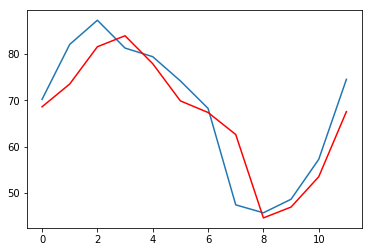

In [36]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('data/monthdatacut.csv', header=0)
# split dataset
X = series.values
train, test = X[1:len(X)-12], X[len(X)-12:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()